In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [12]:
data=pd.read_csv('car_age_price.csv')

In [3]:
data.info()
data.shape
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


In [4]:
data.isnull().values.sum()

0

no missing values found

           Year     Price
Year   1.000000  0.776302
Price  0.776302  1.000000


<Axes: >

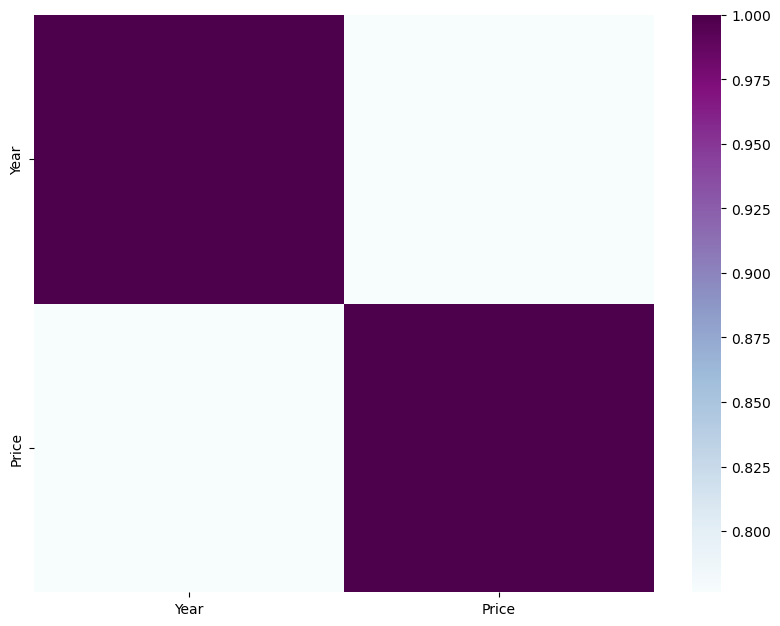

In [5]:
#finding co relation between values
corr_var=data.corr()
print(corr_var)
plt.figure(figsize=(10,7.5))
sns.heatmap(corr_var,cmap='BuPu')

In [13]:
# Split data into features (X) and target variable (y)
X = data['Year'].values.reshape(-1, 1)
y = data['Price'].values

In [14]:
#split data for training and testing
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [15]:
# Fit linear regression model
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [17]:
#prediction
y_pred=model.predict(X_test)

In [21]:
#model evaluation for mse
mse=mean_squared_error(y_test,y_pred)
print('mean squared error is:',mse)

mean squared error is: 4326906256.829671


In [37]:
#prediction price for 2022 model 
p_price=model.predict(([[2022]]))
print("price of 2022 model car will be :",p_price)

price of 2022 model car will be : [743601.61594504]


In [27]:







#implementing lasso regression
from sklearn.linear_model import Lasso

In [28]:
# Seperate target data
X = data['Year'].values.reshape(-1, 1)
y = data['Price'].values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [30]:
#fit lasso regression model
lasso_model=Lasso(alpha=0.1)
lasso_model.fit(X_train,y_train)

Lasso(alpha=0.1)

In [31]:
#prediction
lasso_pred=lasso_model.predict(X_test)

In [33]:
#evaluate the model
mse_lasso = mean_squared_error(y_test, lasso_pred)
print("Mean Squared Error (Lasso):", mse_lasso)

Mean Squared Error (Lasso): 4326901608.19506


In [36]:
# Predict price for 2022 model using Lasso
predicted_price_2022_lasso = lasso_model.predict([[2022]])
print("Predicted price for 2022 model (Lasso):", predicted_price_2022_lasso[0])

Predicted price for 2022 model (Lasso): 743601.3917776793


In [ ]:
#here mse got by linear regression is 4326906256.829671 and of lasso mregression is 4326901608.19506 the one with less error is considred as best method
#so lasso regression is the godd option